In [42]:
#Georg's notebook
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv("red_wine.csv")

In [30]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
data.quality.value_counts() #Siit näeme, et hided 5 ja 6 on kõige sagedasemad.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
#Kogu dataseti korrelatsioonide analüüs:
#Koopia:
modded_data = data.copy()

In [33]:
#Suvaliselt veergude väärtuste segamine
for column in modded_data:
    temp = modded_data[column]
    np.random.shuffle(temp)
    modded_data[column] = temp

In [21]:
a = False #Siin osas leitakse suurimad korrelatsioonid, ning kuna 100 kordusega parima leidmine on aega võttev protsess, siis
#olen selle hetkel mitte-töötama pannud. Siis printisin välja max_list ja võtsin sealt suurima korrelatsiooni, mis oli
# 0.086253. See on significance threshold nüüd.
if a:
    
    max_list = []
    for i in range (100):
        modded_data = data.copy()
        for column in modded_data:
            temp = modded_data[column]
            np.random.shuffle(temp)
            modded_data[column] = temp
        corr = modded_data.iloc[:,0:12].corr().replace(1, np.NaN).abs()
        for i in range(0,1): #https://stackoverflow.com/questions/49355681/calculating-pairwise-correlations-of-large-dataframe-among-a-certain-number-of-c
            max_val = max(corr.max())
            max_list.append((max_val, corr.columns[np.where(corr == max_val)[0][:]][0],
            corr.columns[np.where(corr == max_val)[0][:]][1]))
            corr.replace(max_val, np.NaN, inplace=True)

In [35]:
oige_max = [] #Leiame, millised veerud on omavahel korrelatsioonis.
oige_min = []
corr = data.iloc[:,0:100].corr().replace(1, np.NaN).abs()
for i in range(0, 20):
    max_val = max(corr.max())
    min_val = min(corr.max())
    if max_val > 0.086253:
        oige_max.append((max_val, corr.columns[np.where(corr == max_val)[0][:]][0],
        corr.columns[np.where(corr == max_val)[0][:]][1]))
        corr.replace(max_val, np.NaN, inplace=True)
    else:
        oige_min.append((min_val, corr.columns[np.where(corr == min_val)[0][:]][0],
        corr.columns[np.where(corr == min_val)[0][:]][1]))
        corr.replace(min_val, np.NaN, inplace=True)

In [37]:
#Kõigil on korrelatsioon suurem kui significance value.

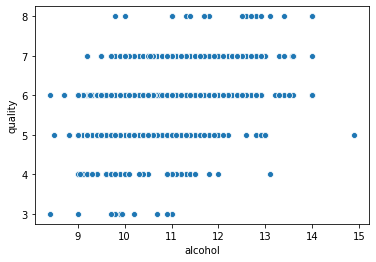

In [43]:
#Alkoholisisalduse mõju kvaliteedile:
x = data["alcohol"]
y = data["quality"]
sns.scatterplot(x,y)

In [49]:
#Vaatan, kuidas on alkoholisisalduse järgi jaotused:
A8_9=0
A9_10=0
A10_11=0
A11_12=0
A12_13=0
A13_14=0
A14_15=0
A15_X=0
for i in range(len(x)):
    if x[i] <= 8.5:
        A8_9 += 1
    elif x[i] > 8.5 and x[i] <= 9.5:
        A9_10 += 1
    elif x[i] > 9.5 and x[i] <= 10.5:
        A10_11 += 1
    elif x[i] > 10.5 and x[i] <= 12:
        A11_12 += 1
    elif x[i] > 12 and x[i] <= 13:
        A12_13 +=1
    elif x[i] > 13 and x[i] <= 14:
        A13_14 +=1
    elif x[i] > 14 and x[i] <= 15:
        A14_15 += 1
    else:
        A15_X += 1
print(A8_9)
print(A9_10)
print(A10_11)
print(A11_12)
print(A12_13)
print(A13_14)
print(A14_15)
print(A15_X)

3
433
547
475
118
22
1
0


In [53]:
#Kategoriseerin alkoholisisalduse järgi vahemikesse, eelmise statistika järgi võtan nii, et esimene hulgad on nii:
#Esimene - Madal - alkoholi sisaldus kuni 9.5%
#Teine - Alkoholi sisaldus 9.5-10.5
#Kolmas - Alkoholi sisaldus 10.5-12
#Neljas - Kõrge - alkoholi sisaldus üle 12%
Esimene_Kval = []
Teine_Kval = []
Kolmas_Kval = []
Neljas_Kval = []
for i in range(len(x)):
    if x[i] <= 9.5:
        Esimene_Kval.append(y[i])
    elif x[i] > 9.5 and x[i] <= 10.5:
        Teine_Kval.append(y[i])
    elif x[i] > 10.5 and x[i] <= 12:
        Kolmas_Kval.append(y[i])
    else:
        Neljas_Kval.append(y[i])
        

In [56]:
#Leian keskmise veini kvaliteedi nendes vahemikes
def keskmine(a):
    summa = 0
    for i in range(len(a)):
        summa += a[i]
    return summa/len(a)
print("Esimese hulga keskmine: " + str(keskmine(Esimene_Kval)))
print("Teise hulga keskmine: " + str(keskmine(Teine_Kval)))
print("Kolmanda hulga keskmine: " + str(keskmine(Kolmas_Kval)))
print("Neljanda hulga keskmine: " + str(keskmine(Neljas_Kval)))

Esimese hulga keskmine:5.256880733944954
Teise hulga keskmine:5.453382084095064
Kolmanda hulga keskmine:5.95578947368421
Neljanda hulga keskmine:6.439716312056738


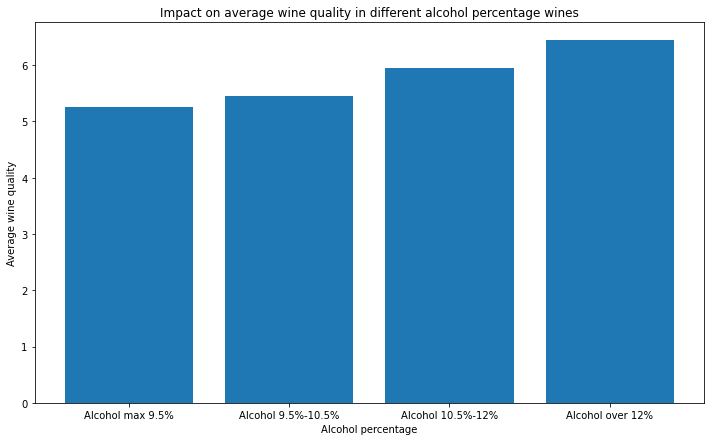

In [66]:
abi_x = ["Alcohol max 9.5%", "Alcohol 9.5%-10.5%", "Alcohol 10.5%-12%", "Alcohol over 12%"]
abi_y = [keskmine(Esimene_Kval), keskmine(Teine_Kval), keskmine(Kolmas_Kval), keskmine(Neljas_Kval)]
plt.figure(figsize = (12,7))
plt.bar(abi_x, abi_y)
plt.title("Impact on average wine quality in different alcohol percentage wines")
plt.xlabel("Alcohol percentage")
plt.ylabel("Average wine quality")
plt.show()

In [69]:
#Edasi teen nii, et kui veini hinne on 3 või 4, ütleme, et see on halb,
#Hinne 5,6 on keskmine
#Hinne 7 on hea
#Hinne 8 on super
#Sellega hindame iga alkoholi protsendi kategooriat eraldi ja selle kohta tulevad eraldi plotid
def jagunemine(a):
    Halb = 0
    Keskmine = 0
    Hea = 0
    Super = 0
    Tulemus = []
    for i in range (len(a)):
        if a[i] == 3 or a[i] == 4:
            Halb += 1
        elif a[i] == 5 or a[i] == 6:
            Keskmine += 1
        elif a[i] == 7:
            Hea +=1
        else:
            Super +=1
    Halb_prc = Halb/len(a)
    Keskmine_prc = Keskmine/len(a)
    Hea_prc = Hea/len(a)
    Super_prc = Super/len(a)
    Tulemus = [Halb_prc, Keskmine_prc, Hea_prc, Super_prc]
    return Tulemus
Jagunemine_Esimene = jagunemine(Esimene_Kval)
Jagunemine_Teine = jagunemine(Teine_Kval)
Jagunemine_Kolmas = jagunemine(Kolmas_Kval)
Jagunemine_Neljas = jagunemine(Neljas_Kval)

In [70]:
#Teen 4 ploti
def barplot(X, Y, X_title, Y_title, Size1, Size2, Title):
    plt.figure(figsize = (Size1, Size2))
    plt.bar(X, Y)
    plt.title(Title)
    plt.xlabel(X_title)
    plt.ylabel(Y_title)
    plt.show()


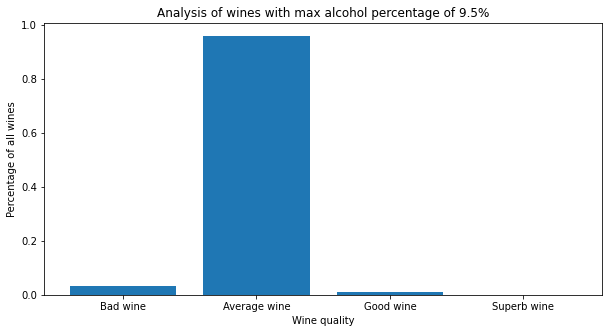

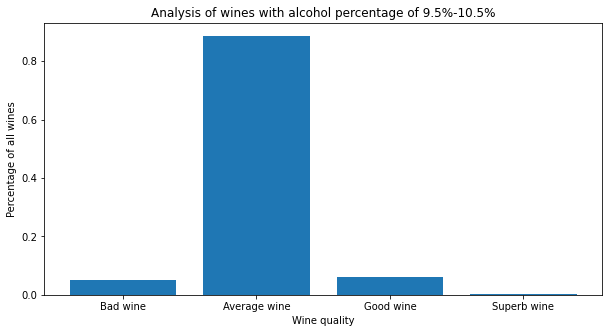

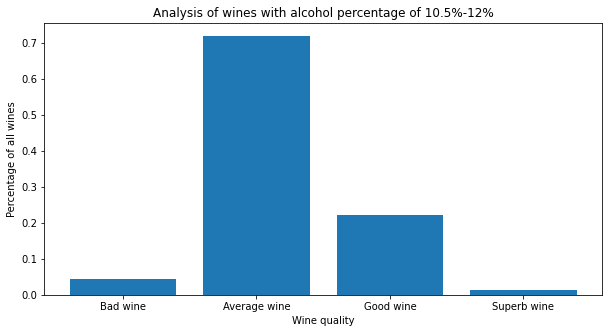

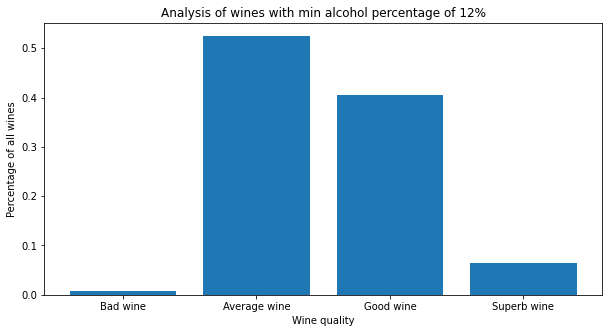

In [73]:
abi = ["Bad wine", "Average wine", "Good wine", "Superb wine"]
barplot(abi, Jagunemine_Esimene, "Wine quality", "Percentage of all wines", 10, 5, "Analysis of wines with max alcohol percentage of 9.5%")
barplot(abi, Jagunemine_Teine, "Wine quality", "Percentage of all wines", 10, 5, "Analysis of wines with alcohol percentage of 9.5%-10.5%")
barplot(abi, Jagunemine_Kolmas, "Wine quality", "Percentage of all wines", 10, 5, "Analysis of wines with alcohol percentage of 10.5%-12%")
barplot(abi, Jagunemine_Neljas, "Wine quality", "Percentage of all wines", 10, 5, "Analysis of wines with min alcohol percentage of 12%")